In [2]:
import json
import cv2
import numpy as np
from glob import glob
import os
import os.path as osp
from imageio import imread
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

In [3]:
with open("./predictions/output.csv", 'r') as f:
    data = json.load(f)

In [4]:
def draw_bbox(image, bbox, color=(0, 0, 255), thickness=1, thickness_sub=None, double_lined=False,
              write_point_numbers=False):
    """이미지에 하나의 bounding box를 그려넣는 함수
    """
    thickness_sub = thickness_sub or thickness * 3
    basis = max(image.shape[:2])
    fontsize = basis / 4000
    x_offset, y_offset = int(fontsize * 12), int(fontsize * 10)
    color_sub = (255 - color[0], 255 - color[1], 255 - color[2])

    points = [(int(np.rint(p[0])), int(np.rint(p[1]))) for p in bbox]

    for idx in range(len(points)):
        if double_lined:
            cv2.line(image, points[idx], points[(idx + 1) % len(points)], color_sub,
                     thickness=thickness_sub)
        cv2.line(image, points[idx], points[(idx + 1) % len(points)], color, thickness=thickness)

    if write_point_numbers:
        for idx in range(len(points)):
            loc = (points[idx][0] - x_offset, points[idx][1] - y_offset)
            if double_lined:
                cv2.putText(image, str(idx), loc, cv2.FONT_HERSHEY_SIMPLEX, fontsize, color_sub,
                            thickness_sub, cv2.LINE_AA)
            cv2.putText(image, str(idx), loc, cv2.FONT_HERSHEY_SIMPLEX, fontsize, color, thickness,
                        cv2.LINE_AA)


def draw_bboxes(image, bboxes, color=(0, 0, 255), thickness=1, thickness_sub=None,
                double_lined=False, write_point_numbers=False):
    """이미지에 다수의 bounding box들을 그려넣는 함수
    """
    for bbox in bboxes:
        draw_bbox(image, bbox, color=color, thickness=thickness, thickness_sub=thickness_sub,
                  double_lined=double_lined, write_point_numbers=write_point_numbers)

In [5]:
img_lists = glob('../data/medical/img/test/*.jpg')
img_lists = [i.split('/')[-1] for i in img_lists]

In [8]:
sample_id = img_lists[0]
image_fpath = osp.join('../data/medical/img/test/', sample_id)
print(image_fpath)
image = imread(image_fpath)

print('Image:\t{}'.format(image.shape))
bboxes, labels = [], []
for word_info in data['images'][sample_id]['words'].values():
    
    if len(word_info['points']) > 4:
        continue
        
    bboxes.append(np.array(word_info['points']))
bboxes = np.array(bboxes, dtype=np.float32)

print('Bounding boxes:\t{}'.format(bboxes.shape))

../data/medical/img/test/drp.en_ko.in_house.deepnatural_002623.jpg
Image:	(2001, 2911, 3)
Bounding boxes:	(435, 4, 2)


/tmp/ipykernel_237414/3736624893.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_fpath)


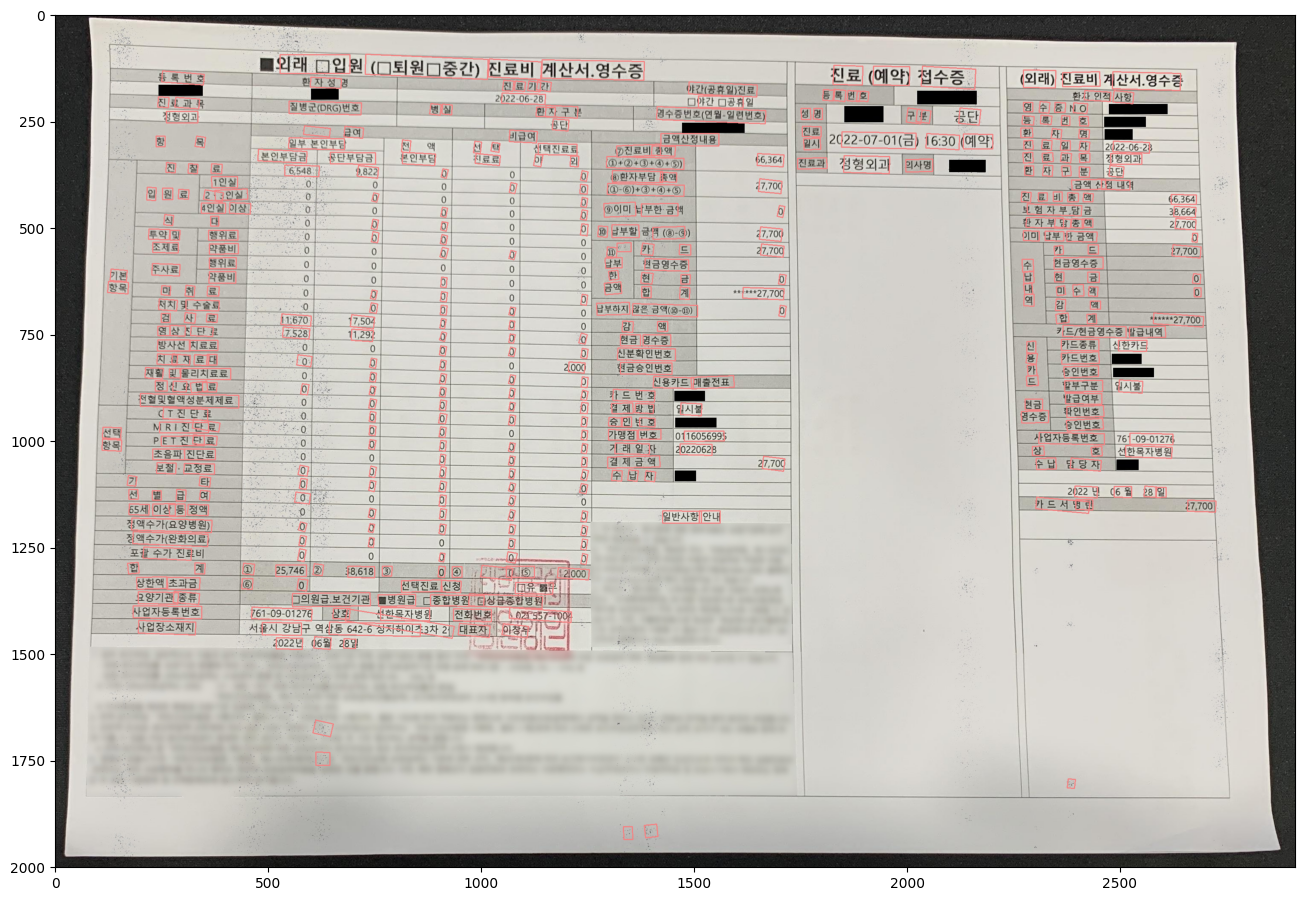

In [9]:
vis = image.copy()
draw_bboxes(vis, bboxes, double_lined=False, color=(242, 133, 133), thickness=2, thickness_sub=None, write_point_numbers=False)

plt.figure(figsize=(16, 16))
plt.imshow(vis)